In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,40.078390,0.910947,6.974412,10.759720,20.130089
1,37.056169,5.644197,12.608257,35.927439,22.983597
2,47.651121,6.171460,8.995699,-10.757438,22.235497
3,52.536987,11.468897,11.340837,-9.229733,23.219042
4,49.109788,11.109313,10.140805,-3.131396,25.427133


<AxesSubplot:ylabel='Density'>

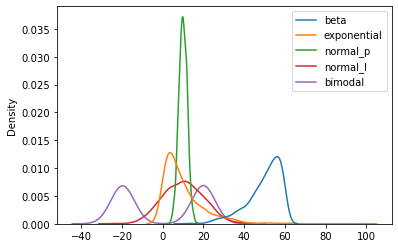

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.951016,10.069906,9.943912,10.134906,0.074147
std,8.387893,10.247747,2.035690,9.992682,20.071918
min,11.919871,0.002000,4.237280,-23.958045,-29.433913
25%,45.720680,3.064954,8.561014,2.969961,-19.979770
50%,52.102209,6.717304,9.927363,10.132203,0.009540
75%,56.416410,13.636051,11.405640,17.039219,19.953820
max,59.986501,97.356950,16.970032,42.787384,30.394933


<AxesSubplot:ylabel='Density'>

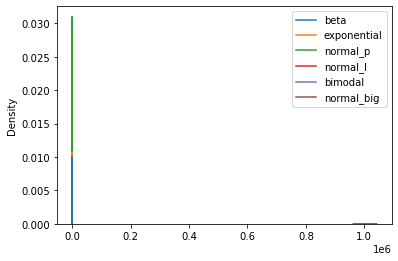

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

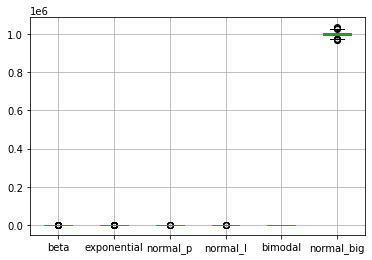

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

In [11]:
# lấy danh sáchc cột
col_names = list(df.columns)

In [12]:
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [13]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.177598,-0.894201,-1.459449,0.062559,0.999704,-0.149351
1,-1.538086,-0.432088,1.309471,2.582434,1.141939,0.103806
2,-0.274329,-0.380610,-0.466027,-2.091810,1.104650,1.470469
3,0.308452,0.136585,0.686560,-1.938852,1.153675,-0.154332
4,-0.100341,0.101479,0.096769,-1.328266,1.263739,-0.129004


<AxesSubplot:ylabel='Density'>

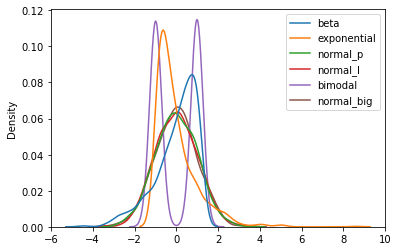

In [14]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.566414e-16,-1.565414e-17,1.892930e-17,-1.003642e-16,-6.725731e-16,9.720239e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.536321e+00,-9.829423e-01,-2.804694e+00,-3.413499e+00,-1.470852e+00,-3.204921e+00
25%,-5.045907e-01,-6.839023e-01,-6.796663e-01,-7.173780e-01,-9.996031e-01,-6.732826e-01
50%,2.565923e-01,-3.273188e-01,-8.133765e-03,-2.705893e-04,-3.220391e-03,1.348379e-02
75%,7.711864e-01,3.481671e-01,7.184093e-01,6.912827e-01,9.909178e-01,6.521373e-01
max,1.197024e+00,8.521943e+00,3.453195e+00,3.269274e+00,1.511363e+00,3.547183e+00


<AxesSubplot:>

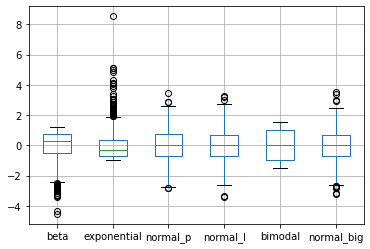

In [16]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()